# Introduction

An insurance company provided a wide range of insurance products and services designed to meet their customer needs for over 100 years.

Many insured properties receive a home inspection. These inspections review the condition of key attributes of the property, including things like the foundation, roof, windows and sliding. The results of an inspection help the insurance company to insure.

# Import Packages

In [ ]:
import pandas as pd
import matplotlib as mb
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Data Loading

Load the property inspection dataset. The dataset have 33 properties which are both numerical and categorical data, column names are not clearly explaining the property. Considering this has unlabeled data. Applying feature selection is difficult on unlabeled data.

In [2]:
traininfo = pd.read_csv("PropertyInspection_train.csv")
traininfo.head(10)

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,1,15,3,2,N,B,N,B,B,...,2,37,1,11,6,Y,N,E,2,2
1,2,4,16,14,5,H,B,N,B,B,...,2,22,1,18,5,Y,Y,E,2,1
2,3,1,10,10,5,N,K,N,B,B,...,6,37,2,14,6,Y,Y,E,6,1
3,4,1,18,18,5,N,K,N,B,B,...,2,25,1,1,6,Y,N,C,2,6
4,5,1,13,19,5,N,H,N,B,B,...,1,22,1,2,7,N,N,E,1,1
5,12,1,14,12,2,N,K,N,B,B,...,1,37,1,5,7,N,N,A,1,9
6,15,5,8,17,1,E,K,N,B,B,...,2,25,1,20,3,Y,N,D,2,11
7,19,1,14,20,4,E,K,N,B,B,...,2,40,1,18,7,Y,N,E,3,2
8,21,1,8,2,2,W,C,N,D,B,...,1,34,1,13,5,N,N,A,2,1
9,22,1,5,4,3,B,I,N,D,B,...,4,40,1,6,3,Y,Y,E,4,1


# Data Manipulation and Feature Selection

Below are the column names of this dataset, which exclude Id column, as it just represents the row count.

In [3]:
traininfo.columns

Index(['Id', 'Hazard', 'T1_V1', 'T1_V2', 'T1_V3', 'T1_V4', 'T1_V5', 'T1_V6',
       'T1_V7', 'T1_V8', 'T1_V9', 'T1_V10', 'T1_V11', 'T1_V12', 'T1_V13',
       'T1_V14', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V1', 'T2_V2', 'T2_V3',
       'T2_V4', 'T2_V5', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10',
       'T2_V11', 'T2_V12', 'T2_V13', 'T2_V14', 'T2_V15'],
      dtype='object')

Info method briefs the records count, data type. It also gives us the each data type count at the end of the output.

In [4]:
traininfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 34 columns):
Id        50999 non-null int64
Hazard    50999 non-null int64
T1_V1     50999 non-null int64
T1_V2     50999 non-null int64
T1_V3     50999 non-null int64
T1_V4     50999 non-null object
T1_V5     50999 non-null object
T1_V6     50999 non-null object
T1_V7     50999 non-null object
T1_V8     50999 non-null object
T1_V9     50999 non-null object
T1_V10    50999 non-null int64
T1_V11    50999 non-null object
T1_V12    50999 non-null object
T1_V13    50999 non-null int64
T1_V14    50999 non-null int64
T1_V15    50999 non-null object
T1_V16    50999 non-null object
T1_V17    50999 non-null object
T2_V1     50999 non-null int64
T2_V2     50999 non-null int64
T2_V3     50999 non-null object
T2_V4     50999 non-null int64
T2_V5     50999 non-null object
T2_V6     50999 non-null int64
T2_V7     50999 non-null int64
T2_V8     50999 non-null int64
T2_V9     50999 non-null int64
T2_V10    

describe method gives the std, min, mean, 25%, 50%, 75% and max values for all numerical data. 

In [5]:
traininfo.describe()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15
count,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000,50999.000000
mean,50929.727897,4.022785,9.722093,12.847585,3.186004,7.020451,13.996255,1.578521,57.580051,12.419616,10.259495,1.948215,33.487755,1.032236,12.493029,4.496520,2.451126,3.484480
std,29314.685894,4.021194,5.167943,6.255743,1.739369,3.595279,4.647499,0.862882,23.499818,4.783411,4.852008,0.800117,5.834038,0.195893,7.314788,1.896717,1.260074,3.076745
min,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25660.500000,1.000000,6.000000,7.000000,2.000000,3.000000,10.000000,1.000000,40.000000,9.000000,6.000000,2.000000,31.000000,1.000000,6.000000,3.000000,2.000000,1.000000
50%,50977.000000,3.000000,9.000000,14.000000,3.000000,8.000000,15.000000,1.000000,56.000000,11.000000,10.000000,2.000000,34.000000,1.000000,14.000000,4.000000,2.000000,2.000000
75%,76268.500000,5.000000,14.000000,18.000000,4.000000,8.000000,20.000000,2.000000,77.000000,15.000000,14.000000,2.000000,40.000000,1.000000,18.000000,6.000000,3.000000,5.000000
max,101999.000000,69.000000,19.000000,24.000000,9.000000,12.000000,20.000000,4.000000,100.000000,39.000000,22.000000,7.000000,40.000000,3.000000,25.000000,7.000000,7.000000,12.000000


In [6]:
traininfo['T1_V4'].value_counts()

N    25112
B    12502
C     4869
W     3480
E     2702
S     1051
G      669
H      614
Name: T1_V4, dtype: int64

In [7]:
traininfo['T1_V5'].value_counts(ascending=True)

E        5
L        5
D      149
J      188
B     3335
I     4297
C     7845
H    10137
A    10900
K    14138
Name: T1_V5, dtype: int64

Checking for null values in the dataset and below code shows there are no null values.

In [8]:
traininfo.isnull().sum()

Id        0
Hazard    0
T1_V1     0
T1_V2     0
T1_V3     0
T1_V4     0
T1_V5     0
T1_V6     0
T1_V7     0
T1_V8     0
T1_V9     0
T1_V10    0
T1_V11    0
T1_V12    0
T1_V13    0
T1_V14    0
T1_V15    0
T1_V16    0
T1_V17    0
T2_V1     0
T2_V2     0
T2_V3     0
T2_V4     0
T2_V5     0
T2_V6     0
T2_V7     0
T2_V8     0
T2_V9     0
T2_V10    0
T2_V11    0
T2_V12    0
T2_V13    0
T2_V14    0
T2_V15    0
dtype: int64

In [9]:
traininfo.select_dtypes(include=object)

,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V11,T1_V12,T1_V15,T1_V16,T1_V17,T2_V3,T2_V5,T2_V11,T2_V12,T2_V13
0,N,B,N,B,B,D,B,B,A,B,N,N,B,Y,N,E
1,H,B,N,B,B,C,B,B,A,B,Y,Y,C,Y,Y,E
2,N,K,N,B,B,E,H,B,A,R,Y,Y,C,Y,Y,E
3,N,K,N,B,B,E,H,B,A,R,N,N,A,Y,N,C
4,N,H,N,B,B,E,H,B,A,J,N,Y,B,N,N,E
5,N,K,N,B,B,E,H,B,A,K,N,N,A,N,N,A
6,E,K,N,B,B,E,H,B,A,K,N,N,A,Y,N,D
7,E,K,N,B,B,E,I,B,D,R,N,Y,A,Y,N,E
8,W,C,N,D,B,D,B,B,A,D,N,Y,B,N,N,A
9,B,I,N,D,B,F,H,B,A,K,Y,N,A,Y,Y,E


Drop the Id column, it is a rows count which is not required in this analysis.

In [10]:
trainWOId = traininfo.drop(columns='Id')

Plot the heatmap to check the correlation between the properties.

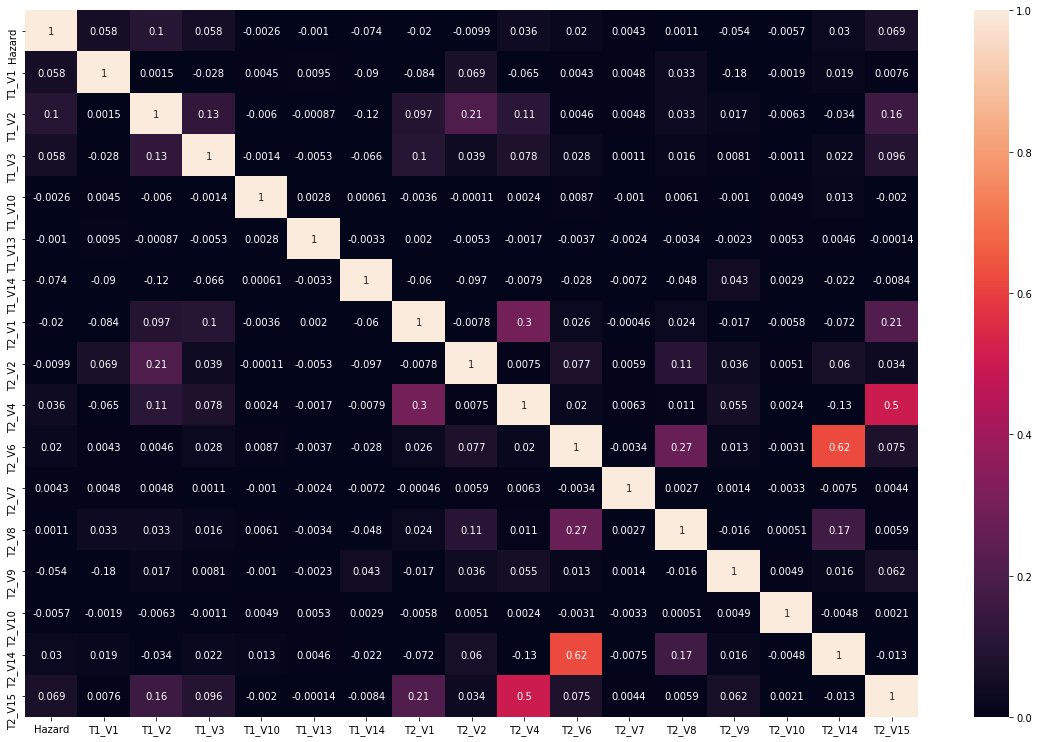

In [11]:
plt.figure(figsize=(20,13))
sb.heatmap(data=trainWOId.select_dtypes(exclude=object).corr(), vmin=0, vmax=1,annot=True)
plt.show()

With reference to above heat map, following are the observations noticed.
1) T2_v6 and T2_V14 are high positively correlated to each other.
2) T2_V15 and T1_V13 are slightly negatively correlated.
3) T2_V4 and T2_V14 are strongly negatively correlated.

In [12]:
#import numpy as np
#train = np.array(traininfo)

#from sklearn import preprocessing
#for i in range(train.shape[1]):
#    if type(train[1,i]) is str:
#        labelEnc = preprocessing.LabelEncoder()
#       labelEnc.fit(list(train[:,i]))
#        train[:,i]=labelEnc.transform(train[:,i])

#train = train.astype(float)
#train[1]

Target variable "Hazard" values are highly spread in the range from 1 to 4. Around 25000 rows are having Hazard value "1" and the numbers are quiet big. There is higher chance the prediction will not be proper, because the data is right skewed. One option is to normalize the values of "Hazard".

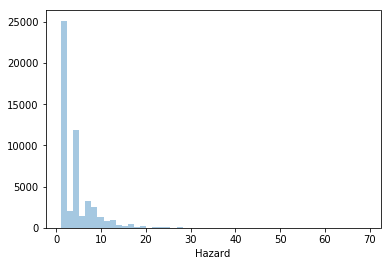

In [13]:
sb.distplot(trainWOId['Hazard'],kde=False)
plt.show()

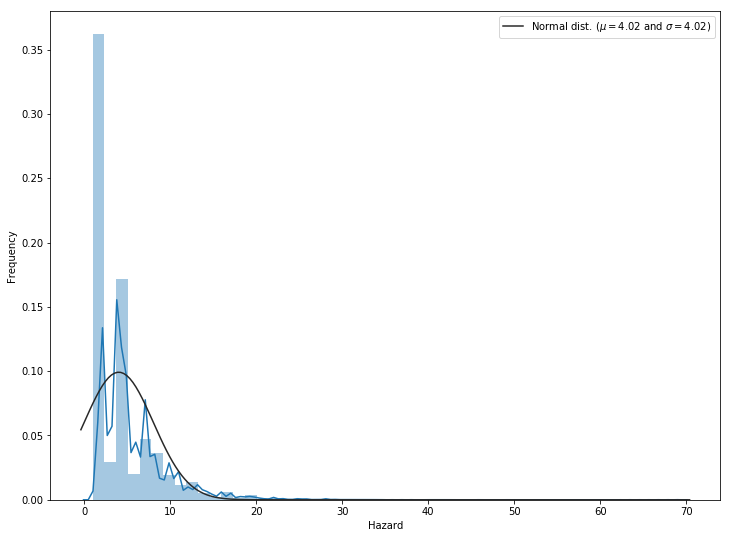

In [14]:
plt.subplots(figsize=(12,9))
sb.distplot(trainWOId['Hazard'],fit=stats.norm)
(mu,sigma) = stats.norm.fit(trainWOId['Hazard'])
plt.legend(['Normal dist. ($\mu=${:.2f} and $\sigma = ${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.show()

Apply normalization on "Hazard" values. Now the values are in the range 0.5 to 4.5.

In [15]:
trainWOId['Hazard'] = np.log1p(trainWOId['Hazard'])

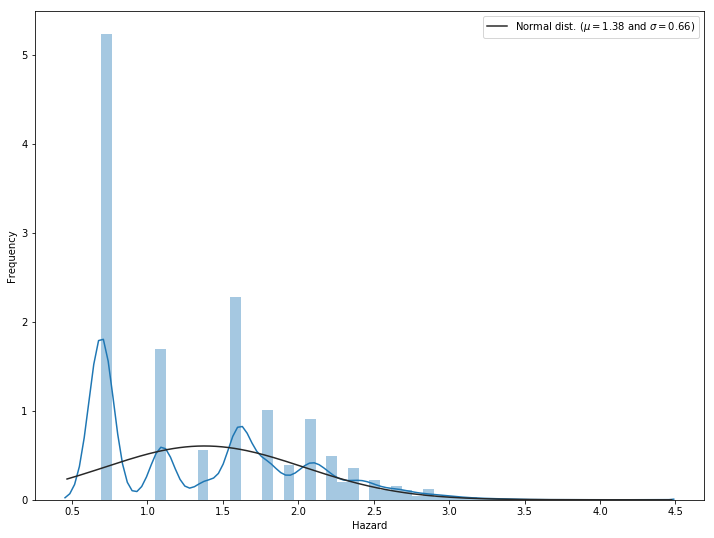

In [16]:
plt.subplots(figsize=(12,9))
sb.distplot(trainWOId['Hazard'],fit=stats.norm)
(mu,sigma) = stats.norm.fit(trainWOId['Hazard'])
plt.legend(['Normal dist. ($\mu=${:.2f} and $\sigma = ${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.show()

There are categorical variables which has to convert into numerical to apply model and predict. One of the option used is LabelEncoder.

In [17]:
LabelEnc = LabelEncoder()

In [18]:
colNames = trainWOId.select_dtypes(include=object).columns

In [19]:
for col in colNames:
    trainWOId[col] = LabelEnc.fit_transform(trainWOId[col])

In [20]:
trainWOId['T1_V5'].value_counts()

8    14138
0    10900
5    10137
2     7845
6     4297
1     3335
7      188
3      149
9        5
4        5
Name: T1_V5, dtype: int64

Check T1_V5 which is a categorical variable which converts into numerical after label encoding.

Create two dataframes (X,Y) with dependent variables into one dataframe and target variable into another dataframe to perform model evaluations.

In [21]:
X = trainWOId.iloc[:,2:]

In [22]:
X

,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,3,2,5,1,0,1,1,2,7,1,...,2,37,1,11,6,1,0,4,2,2
1,14,5,4,1,0,1,1,1,12,1,...,2,22,1,18,5,1,1,4,2,1
2,10,5,5,8,0,1,1,3,12,5,...,6,37,2,14,6,1,1,4,6,1
3,18,5,5,8,0,1,1,3,3,5,...,2,25,1,1,6,1,0,2,2,6
4,19,5,5,5,0,1,1,3,7,5,...,1,22,1,2,7,0,0,4,1,1
5,12,2,5,8,0,1,1,3,12,5,...,1,37,1,5,7,0,0,0,1,9
6,17,1,2,8,0,1,1,3,8,5,...,2,25,1,20,3,1,0,3,2,11
7,20,4,2,8,0,1,1,3,3,6,...,2,40,1,18,7,1,0,4,3,2
8,2,2,7,2,0,3,1,2,8,1,...,1,34,1,13,5,0,0,0,2,1
9,4,3,0,6,0,3,1,4,8,5,...,4,40,1,6,3,1,1,4,4,1


In [23]:
Y = pd.DataFrame()
Y['Hazard'] = trainWOId['Hazard']
Y

,Hazard
0,0.693147
1,1.609438
2,0.693147
3,0.693147
4,0.693147
5,0.693147
6,1.791759
7,0.693147
8,0.693147
9,0.693147


# Model Evaluation

Split the dataframe into train and test using train_test_split method with test size of 20%.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=1)

In [25]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (40799, 31)
y_train shape:  (40799, 1)

Test cases as below
X_test shape:  (10200, 31)
y_test shape:  (10200, 1)


In [26]:
import sklearn

Function to plot the importance of all the dependent variables with Target variables after fitting the data into the models.

In [27]:
def plot_importance(model):
    k = list(zip(X,model.feature_importances_))
    k.sort(key=lambda tup: tup[1])
    
    labels,vals = zip(*k)
    plt.figure(figsize=(15,15))
    plt.barh(np.arange(len(X.columns)),vals,align='center')
    plt.yticks(np.arange(len(X.columns)), labels)

Using Random Forest Regressor with 25 estimators and plot the importance of all the dependent variables and identify the top 5 variables.

In [28]:
randomReg = RandomForestRegressor(n_estimators=25,max_features="sqrt",n_jobs=-1,verbose=1)
randomReg.fit(X_train,y_train)

C:\Users\chaitanyakumar.kakar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

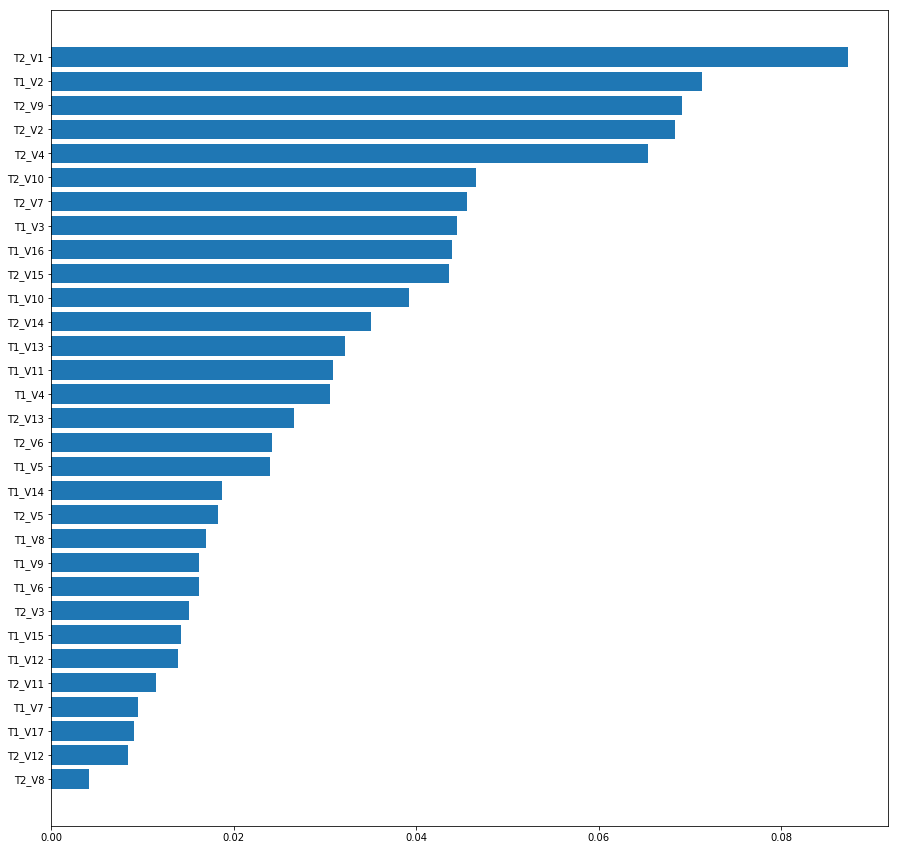

In [29]:
plot_importance(randomReg)

T2_V1, T1_V2, T2_V9, T2_V2 and T2_V4 are the top 5 Varaibles which gives more value to the model. Increase the estimators to 500 and max_features as "log2" and plot the dependent variables importance.

C:\Users\chaitanyakumar.kakar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.0s finished


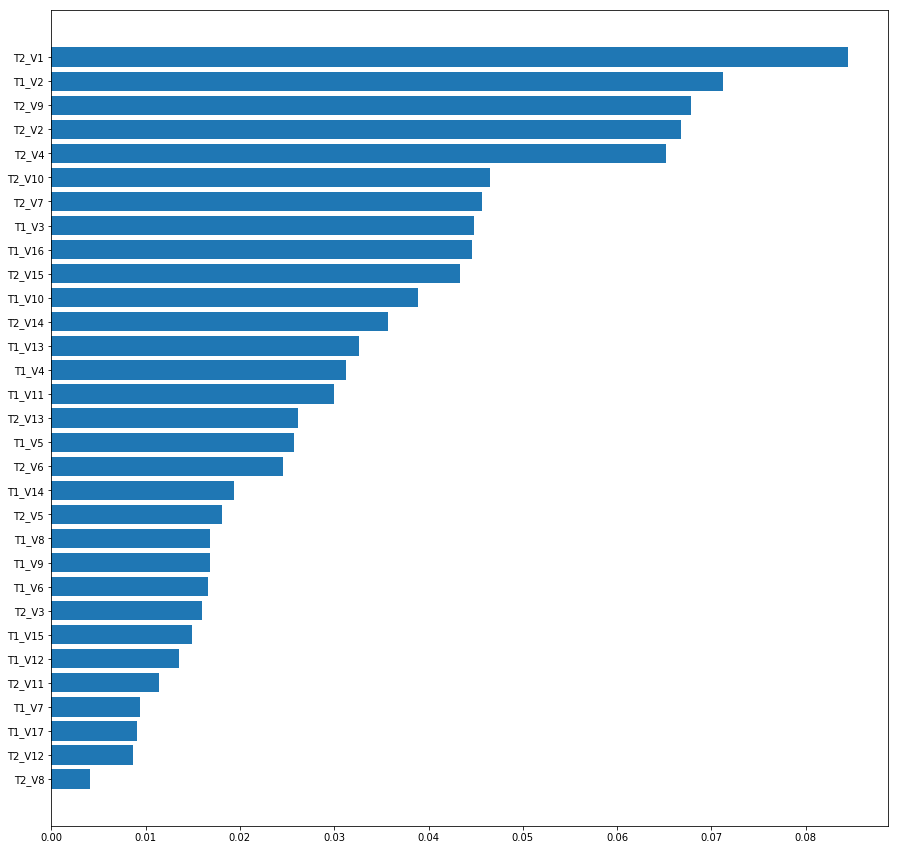

In [30]:
randomRegSec = RandomForestRegressor(n_estimators=500,max_features="log2",n_jobs=-1,verbose=1)
randomRegSec.fit(X_train,y_train)
plot_importance(randomRegSec)

Again T2_V1, T1_V2, T2_V9, T2_V2 and T2_V4 are the top 5 dependent variables. Top 5 are same in both random forest models. Now try to apply Xgboost and plot the importance again.

In [31]:
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

def rmspe(y, y_hat):
    return np.sqrt(np.mean(((y - y_hat) / y) ** 2))

xgboost_tree = xgb.XGBRegressor(n_jobs = -1, n_estimators=1000, gamma=0.8, subsample=0.8,min_child_weight = 2,max_depth = 2,reg_alpha = 0.05,tree_method = 'exact',booster='gbtree', random_state = 1)
xgboost_tree.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],eval_metric = rmspe_xg,early_stopping_rounds = 300)

[17:53:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.02699	validation_1-rmse:1.02941	validation_0-rmspe:0.653217	validation_1-rmspe:0.654979
Multiple eval metrics have been passed: 'validation_1-rmspe' will be used for early stopping.

Will train until validation_1-rmspe hasn't improved in 300 rounds.
[1]	validation_0-rmse:0.966753	validation_1-rmse:0.969202	validation_0-rmspe:0.616564	validation_1-rmspe:0.618533
[2]	validation_0-rmse:0.915027	validation_1-rmse:0.917421	validation_0-rmspe:0.593278	validation_1-rmspe:0.595386
[3]	validation_0-rmse:0.870686	validation_1-rmse:0.873045	validation_0-rmspe:0.583938	validation_1-rmspe:0.586052
[4]	validation_0-rmse:0.833125	validation_1-rmse:0.835496	validation_0-rmspe:0.587492	validation_1-rmspe:0.589622
[5]	validation_0-rmse:0.801383	validation_1-rmse:0.803785	validation_0-rmspe:0.602138	validation_1-rmspe:0.604173
[6]	validation_0-rmse:0.774491	validatio

[71]	validation_0-rmse:0.633092	validation_1-rmse:0.633809	validation_0-rmspe:1.24118	validation_1-rmspe:1.24128
[72]	validation_0-rmse:0.633033	validation_1-rmse:0.633761	validation_0-rmspe:1.24122	validation_1-rmspe:1.24148
[73]	validation_0-rmse:0.632958	validation_1-rmse:0.633724	validation_0-rmspe:1.24164	validation_1-rmspe:1.2419
[74]	validation_0-rmse:0.632864	validation_1-rmse:0.633661	validation_0-rmspe:1.24147	validation_1-rmspe:1.24181
[75]	validation_0-rmse:0.632796	validation_1-rmse:0.633616	validation_0-rmspe:1.24133	validation_1-rmspe:1.24181
[76]	validation_0-rmse:0.632685	validation_1-rmse:0.633479	validation_0-rmspe:1.24116	validation_1-rmspe:1.24155
[77]	validation_0-rmse:0.632543	validation_1-rmse:0.633306	validation_0-rmspe:1.24131	validation_1-rmspe:1.24163
[78]	validation_0-rmse:0.632486	validation_1-rmse:0.633298	validation_0-rmspe:1.24078	validation_1-rmspe:1.2411
[79]	validation_0-rmse:0.632433	validation_1-rmse:0.633281	validation_0-rmspe:1.24087	validation_1

[144]	validation_0-rmse:0.628382	validation_1-rmse:0.630125	validation_0-rmspe:1.24176	validation_1-rmspe:1.24412
[145]	validation_0-rmse:0.628354	validation_1-rmse:0.630098	validation_0-rmspe:1.24153	validation_1-rmspe:1.24397
[146]	validation_0-rmse:0.628303	validation_1-rmse:0.630042	validation_0-rmspe:1.242	validation_1-rmspe:1.24442
[147]	validation_0-rmse:0.628268	validation_1-rmse:0.630023	validation_0-rmspe:1.24243	validation_1-rmspe:1.24487
[148]	validation_0-rmse:0.628239	validation_1-rmse:0.630009	validation_0-rmspe:1.24213	validation_1-rmspe:1.24454
[149]	validation_0-rmse:0.628205	validation_1-rmse:0.629974	validation_0-rmspe:1.24204	validation_1-rmspe:1.24443
[150]	validation_0-rmse:0.628164	validation_1-rmse:0.629933	validation_0-rmspe:1.24258	validation_1-rmspe:1.24494
[151]	validation_0-rmse:0.628118	validation_1-rmse:0.629896	validation_0-rmspe:1.24275	validation_1-rmspe:1.24511
[152]	validation_0-rmse:0.628047	validation_1-rmse:0.629836	validation_0-rmspe:1.24235	val

[217]	validation_0-rmse:0.626044	validation_1-rmse:0.628507	validation_0-rmspe:1.24525	validation_1-rmspe:1.24958
[218]	validation_0-rmse:0.626016	validation_1-rmse:0.628493	validation_0-rmspe:1.24548	validation_1-rmspe:1.24991
[219]	validation_0-rmse:0.625981	validation_1-rmse:0.628445	validation_0-rmspe:1.24546	validation_1-rmspe:1.24985
[220]	validation_0-rmse:0.625904	validation_1-rmse:0.628361	validation_0-rmspe:1.24518	validation_1-rmspe:1.2493
[221]	validation_0-rmse:0.625874	validation_1-rmse:0.628344	validation_0-rmspe:1.24535	validation_1-rmspe:1.24943
[222]	validation_0-rmse:0.625859	validation_1-rmse:0.628336	validation_0-rmspe:1.24507	validation_1-rmspe:1.24919
[223]	validation_0-rmse:0.62583	validation_1-rmse:0.628327	validation_0-rmspe:1.24512	validation_1-rmspe:1.24929
[224]	validation_0-rmse:0.625811	validation_1-rmse:0.628337	validation_0-rmspe:1.24519	validation_1-rmspe:1.24942
[225]	validation_0-rmse:0.625777	validation_1-rmse:0.628323	validation_0-rmspe:1.24578	val

[290]	validation_0-rmse:0.62426	validation_1-rmse:0.627703	validation_0-rmspe:1.24745	validation_1-rmspe:1.25318
[291]	validation_0-rmse:0.624242	validation_1-rmse:0.627695	validation_0-rmspe:1.24727	validation_1-rmspe:1.25302
[292]	validation_0-rmse:0.624224	validation_1-rmse:0.627689	validation_0-rmspe:1.24666	validation_1-rmspe:1.25249
[293]	validation_0-rmse:0.624204	validation_1-rmse:0.627658	validation_0-rmspe:1.24658	validation_1-rmspe:1.25241
[294]	validation_0-rmse:0.624186	validation_1-rmse:0.627636	validation_0-rmspe:1.24619	validation_1-rmspe:1.25197
[295]	validation_0-rmse:0.624158	validation_1-rmse:0.627602	validation_0-rmspe:1.24586	validation_1-rmspe:1.25162
[296]	validation_0-rmse:0.62414	validation_1-rmse:0.62758	validation_0-rmspe:1.24594	validation_1-rmspe:1.25164
[297]	validation_0-rmse:0.624123	validation_1-rmse:0.627558	validation_0-rmspe:1.24575	validation_1-rmspe:1.25141
[298]	validation_0-rmse:0.624107	validation_1-rmse:0.627535	validation_0-rmspe:1.24571	vali

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.8,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=2, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=1,
       reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, tree_method='exact', verbosity=1)

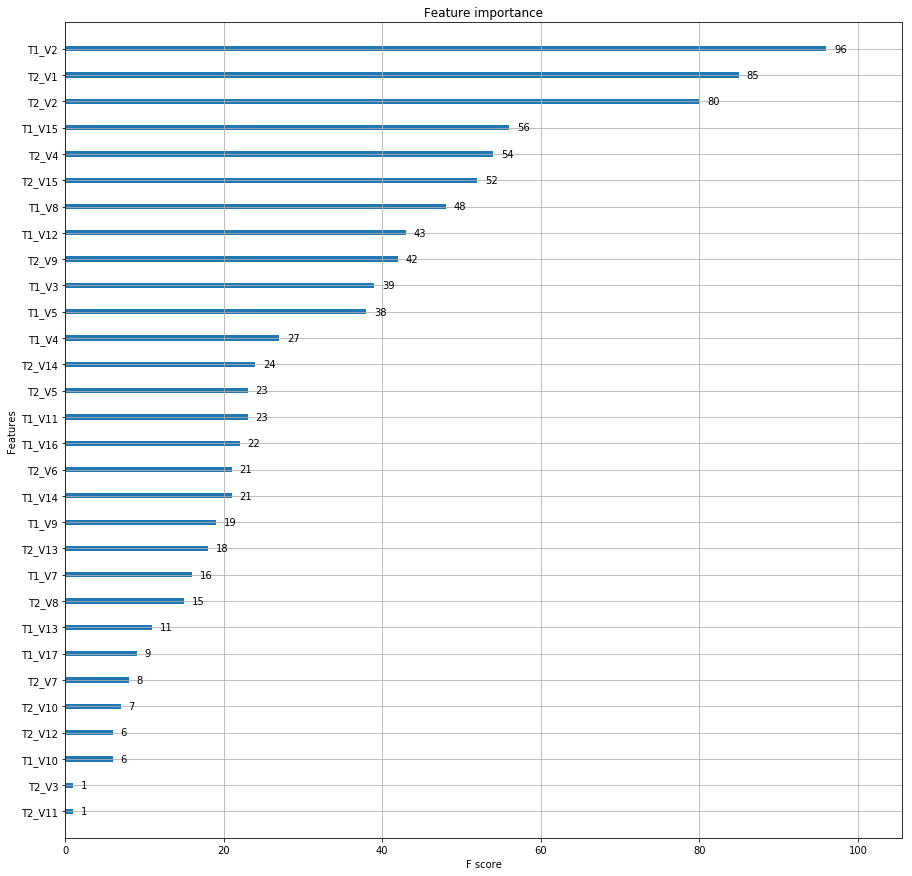

In [32]:
fig, ax = plt.subplots(figsize=(15, 15))
xgb.plot_importance(xgboost_tree,ax=ax)

Xgboost gave T1_V2 is the most important dependent variable, But random forest gave T2_V1 is the important variable and Xgboost gave similar list like random forest except T1_V15.   

In [33]:
HighPerformedCol = ['T1_V2','T2_V1','T2_V2','T1_V15','T2_V4','T2_V9']
HighColDF = pd.DataFrame()
for col in HighPerformedCol:
    HighColDF[col] = trainWOId[col]

HighColDF

,T1_V2,T2_V1,T2_V2,T1_V15,T2_V4,T2_V9
0,3,36,11,0,10,11
1,14,78,10,0,17,18
2,10,71,21,0,13,14
3,18,71,13,0,15,1
4,19,75,10,0,11,2
5,12,65,10,0,14,5
6,17,100,14,0,16,20
7,20,83,13,2,5,18
8,2,20,12,0,4,13
9,4,88,7,0,14,6


Now check how these top dependent variables performance by applying Xgboost and Random forest.

In [34]:
def rmspe(y, y_hat):
    return np.sqrt(np.mean(((y - y_hat) / y) ** 2))

rmpse_scorer = make_scorer(rmspe, greater_is_better=False)

def score(model, X_train, y_train, y_test, y_hat):
    score = cross_val_score(model, X_train, y_train, scoring=rmpse_scorer)
    print('Mean', score.mean())
    print('Variance', score.var())
    print('RMSPE', rmspe(y_test, y_hat))

In [35]:
X1_train, X1_test, y1_train, y1_test = train_test_split(HighColDF,Y,test_size=0.20,random_state=1)

In [36]:
print('X_train shape: ',X1_train.shape)
print('y_train shape: ',y1_train.shape)

X_train shape:  (40799, 6)
y_train shape:  (40799, 1)


In [37]:
randomReg = RandomForestRegressor(n_estimators=25,max_features="sqrt",n_jobs=-1,verbose=1)
randomReg.fit(X1_train,y1_train)
y_pred = randomReg.predict(X1_test)
score(randomReg, X1_train, y1_train['Hazard'], y1_test['Hazard'], y_pred)

C:\Users\chaitanyakumar.kakar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:    0.0s finished


Mean -0.668647004836698
Variance 2.098813803135681e-07
RMSPE 0.6626863362308619


Random forest gives good result. Lets increase the estimators to 1000 and check the RMSPE.

In [38]:
randomReg = RandomForestRegressor(n_estimators=1000,max_features="sqrt",n_jobs=-1,verbose=1)
randomReg.fit(X1_train,y1_train)
y_pred = randomReg.predict(X1_test)
score(randomReg, X1_train, y1_train['Hazard'], y1_test['Hazard'], y_pred)

C:\Users\chaitanyakumar.kakar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.3s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 task

Mean -0.6569033310192308
Variance 2.9934379094087804e-06
RMSPE 0.6517603809287729


Still there is not much difference in RMSPE value. Lets check Xgboost results. 

In [41]:
xgboost_tree = xgb.XGBRegressor(n_jobs = -1, n_estimators=1000, gamma=0.8, subsample=0.8,min_child_weight = 2,max_depth = 2,reg_alpha = 0.05,tree_method = 'exact',booster='gbtree', random_state = 1)
xgboost_tree.fit(X1_train,y1_train,eval_set=[(X1_train,y1_train),(X1_test,y1_test)],eval_metric = rmspe_xg,early_stopping_rounds = 300)
y_hat = xgboost_tree.predict(X1_test)
score(xgboost_tree, X1_train, y1_train['Hazard'], y1_test['Hazard'], y_pred)

[18:01:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.02746	validation_1-rmse:1.02973	validation_0-rmspe:0.652997	validation_1-rmspe:0.654767
Multiple eval metrics have been passed: 'validation_1-rmspe' will be used for early stopping.

Will train until validation_1-rmspe hasn't improved in 300 rounds.
[1]	validation_0-rmse:0.967633	validation_1-rmse:0.969814	validation_0-rmspe:0.616058	validation_1-rmspe:0.617922
[2]	validation_0-rmse:0.91636	validation_1-rmse:0.918404	validation_0-rmspe:0.59282	validation_1-rmspe:0.594589
[3]	validation_0-rmse:0.872468	validation_1-rmse:0.874373	validation_0-rmspe:0.58343	validation_1-rmspe:0.58493
[4]	validation_0-rmse:0.835338	validation_1-rmse:0.837147	validation_0-rmspe:0.586995	validation_1-rmspe:0.588084
[5]	validation_0-rmse:0.804007	validation_1-rmse:0.805687	validation_0-rmspe:0.601413	validation_1-rmspe:0.602114
[6]	validation_0-rmse:0.777565	validation_1-

[71]	validation_0-rmse:0.645327	validation_1-rmse:0.645957	validation_0-rmspe:1.24079	validation_1-rmspe:1.23739
[72]	validation_0-rmse:0.645289	validation_1-rmse:0.645953	validation_0-rmspe:1.24082	validation_1-rmspe:1.23744
[73]	validation_0-rmse:0.645249	validation_1-rmse:0.645938	validation_0-rmspe:1.24136	validation_1-rmspe:1.23799
[74]	validation_0-rmse:0.645188	validation_1-rmse:0.645893	validation_0-rmspe:1.24101	validation_1-rmspe:1.2376
[75]	validation_0-rmse:0.645159	validation_1-rmse:0.645876	validation_0-rmspe:1.24114	validation_1-rmspe:1.23772
[76]	validation_0-rmse:0.645095	validation_1-rmse:0.645854	validation_0-rmspe:1.24082	validation_1-rmspe:1.23751
[77]	validation_0-rmse:0.645062	validation_1-rmse:0.645837	validation_0-rmspe:1.24131	validation_1-rmspe:1.23789
[78]	validation_0-rmse:0.645032	validation_1-rmse:0.645824	validation_0-rmspe:1.24087	validation_1-rmspe:1.23753
[79]	validation_0-rmse:0.644928	validation_1-rmse:0.645766	validation_0-rmspe:1.24111	validation_

[144]	validation_0-rmse:0.643139	validation_1-rmse:0.644726	validation_0-rmspe:1.24121	validation_1-rmspe:1.23919
[145]	validation_0-rmse:0.643125	validation_1-rmse:0.644736	validation_0-rmspe:1.24094	validation_1-rmspe:1.23906
[146]	validation_0-rmse:0.643114	validation_1-rmse:0.644735	validation_0-rmspe:1.24116	validation_1-rmspe:1.23922
[147]	validation_0-rmse:0.643094	validation_1-rmse:0.644734	validation_0-rmspe:1.24146	validation_1-rmspe:1.2395
[148]	validation_0-rmse:0.643017	validation_1-rmse:0.644712	validation_0-rmspe:1.24116	validation_1-rmspe:1.23935
[149]	validation_0-rmse:0.643003	validation_1-rmse:0.644729	validation_0-rmspe:1.24095	validation_1-rmspe:1.2392
[150]	validation_0-rmse:0.64299	validation_1-rmse:0.644721	validation_0-rmspe:1.24148	validation_1-rmspe:1.23972
[151]	validation_0-rmse:0.642974	validation_1-rmse:0.644706	validation_0-rmspe:1.24175	validation_1-rmspe:1.23992
[152]	validation_0-rmse:0.64295	validation_1-rmse:0.644677	validation_0-rmspe:1.24174	valid

[217]	validation_0-rmse:0.641908	validation_1-rmse:0.64454	validation_0-rmspe:1.24185	validation_1-rmspe:1.24225
[218]	validation_0-rmse:0.641896	validation_1-rmse:0.644539	validation_0-rmspe:1.24217	validation_1-rmspe:1.24256
[219]	validation_0-rmse:0.641886	validation_1-rmse:0.644537	validation_0-rmspe:1.24218	validation_1-rmspe:1.24268
[220]	validation_0-rmse:0.641873	validation_1-rmse:0.644533	validation_0-rmspe:1.24193	validation_1-rmspe:1.24241
[221]	validation_0-rmse:0.641851	validation_1-rmse:0.644523	validation_0-rmspe:1.2422	validation_1-rmspe:1.24264
[222]	validation_0-rmse:0.641844	validation_1-rmse:0.644522	validation_0-rmspe:1.24187	validation_1-rmspe:1.24225
[223]	validation_0-rmse:0.641826	validation_1-rmse:0.644505	validation_0-rmspe:1.24187	validation_1-rmspe:1.24226
[224]	validation_0-rmse:0.641817	validation_1-rmse:0.64451	validation_0-rmspe:1.24206	validation_1-rmspe:1.24242
[225]	validation_0-rmse:0.641805	validation_1-rmse:0.644518	validation_0-rmspe:1.24268	vali

[290]	validation_0-rmse:0.641106	validation_1-rmse:0.644562	validation_0-rmspe:1.24239	validation_1-rmspe:1.24485
[291]	validation_0-rmse:0.641093	validation_1-rmse:0.644561	validation_0-rmspe:1.24211	validation_1-rmspe:1.24453
[292]	validation_0-rmse:0.641082	validation_1-rmse:0.644568	validation_0-rmspe:1.24187	validation_1-rmspe:1.24433
[293]	validation_0-rmse:0.641075	validation_1-rmse:0.644567	validation_0-rmspe:1.24185	validation_1-rmspe:1.24432
[294]	validation_0-rmse:0.641064	validation_1-rmse:0.644567	validation_0-rmspe:1.24132	validation_1-rmspe:1.24383
[295]	validation_0-rmse:0.641047	validation_1-rmse:0.644549	validation_0-rmspe:1.24114	validation_1-rmspe:1.24361
[296]	validation_0-rmse:0.641045	validation_1-rmse:0.644547	validation_0-rmspe:1.24121	validation_1-rmspe:1.24358
[297]	validation_0-rmse:0.641034	validation_1-rmse:0.644534	validation_0-rmspe:1.24079	validation_1-rmspe:1.24316
[298]	validation_0-rmse:0.641021	validation_1-rmse:0.644503	validation_0-rmspe:1.24073	v

Xgboost results also good, but RMSPE value is almost same like Random forest.
Let's apply Gradient Boost Regressor and check the RMSPE value.

In [52]:
gradBoostReg = sklearn.ensemble.GradientBoostingRegressor(loss='ls', n_estimators=1000,learning_rate=0.5, criterion='friedman_mse', max_features='sqrt', random_state=3)
#gradBoostReg = sklearn.ensemble.GradientBoostingRegressor(loss='ls', n_estimators=1000, random_state=3)
gradBoostReg.fit(X1_train,y1_train)
y_pred = gradBoostReg.predict(X1_test)
score(gradBoostReg, X1_train, y1_train['Hazard'], y1_test['Hazard'], y_pred)

C:\Users\chaitanyakumar.kakar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean -0.6528672021661466
Variance 3.925584722281381e-06
RMSPE 0.6389285597332596


Well, Gradient Boost Regressor also performs good.